**Random Forest Regressor**  


In [1]:
#For Running on Colab
!pip install pyspark
!pip install -U -q PyDrive
!apt install openjdk-8-jdk-headless -qq
import os
os.environ['JAVA_HOME'] = '/usr/lib/jvm/java-8-openjdk-amd64'

openjdk-8-jdk-headless is already the newest version (8u402-ga-2ubuntu1~22.04).
0 upgraded, 0 newly installed, 0 to remove and 45 not upgraded.


In [2]:
#  Importing Required Libraries
import pyspark
from pyspark.sql import *
from pyspark.sql.functions import *
from pyspark import SparkContext, SparkConf

# Creating the Spark session and ContextRun PySpark.
conf = SparkConf().set("spark.ui.port","4050")
sc = pyspark.SparkContext(conf=conf)
spark = SparkSession.builder.appName("DataFrame").config('spark.ui.port', '4050').getOrCreate()
spark

**Results with 70-30 train test split and max depth of trees = 6**

In [3]:
from pyspark.mllib.regression import LabeledPoint
from pyspark.mllib.tree import RandomForest
from pyspark.mllib.linalg import Vectors
from sklearn.metrics import  mean_absolute_percentage_error, mean_absolute_error, mean_squared_error, mean_squared_log_error, r2_score
import matplotlib.pyplot as plt
import numpy as np

randomForestDF = spark.read.csv("scaled_data.csv", header=True, inferSchema=True)

# Converting to RDD of LabeledPoint objects. Not using the target column, "Yield" to make feature vector
rddLabeledPoints = randomForestDF.rdd.map(lambda row: LabeledPoint(row["Yield"], Vectors.dense(row[1:-1])))

train_data, test_data = rddLabeledPoints.randomSplit([0.7, 0.3], seed=42)  #70% training, 30% testing split of data

# Parameters for training model
cFInfo = {} #empty because categorical variables are already properly encoded as numerical values
numTrees = 3  # Trees in random forest
featureSubsetStrategy = "auto"  # this is the strategy for selecting the feature subset
impurity = "variance"  # Impurity measure for variance calculation
maxDepth = 6  # Maximum depth of the trees
maxBins = 32  # Maximum number of bins used for splitting features
seed = 42  # for reproducibility in bootstrapping and feature subset selection

model = RandomForest.trainRegressor(train_data, cFInfo, numTrees,
                                    featureSubsetStrategy=featureSubsetStrategy, impurity=impurity,
                                    maxDepth=maxDepth, maxBins=maxBins, seed=seed)

# MODEL EVALUATION ON TEST DATA
predictions = model.predict(test_data.map(lambda x: x.features))
labelsPredictions = test_data.map(lambda lp: lp.label).zip(predictions)
actualValues = labelsPredictions.map(lambda lp: lp[0]).collect()
predictedValues = labelsPredictions.map(lambda lp: lp[1]).collect()

# 1) TEST MSE
testMSE = labelsPredictions.map(lambda lp: (lp[0] - lp[1]) ** 2).mean()
print("Test Mean Squared Error = " + str(testMSE))

# 2) Mean Absolute Error (MAE)
testMAE = np.mean(np.abs(np.array(actualValues) - np.array(predictedValues)))
print("Test Mean Absolute Error (MAE) =", testMAE)

# 3) Mean Absolute Percentage Error (MAPE)
testMAPE = np.mean(np.abs((np.array(actualValues) - np.array(predictedValues)) / np.array(actualValues))) * 100
print("Test Mean Absolute Percentage Error (MAPE) =", testMAPE)

# 4) Root Mean Squared Error (RMSE)
testRMSE = np.sqrt(mean_squared_error(actualValues, predictedValues))
print("Test Root Mean Squared Error (RMSE) =", testRMSE)

# 5) Calculate R-squared (R2)
test_r2 = r2_score(actualValues, predictedValues)
print("Test R-squared (R2) =", test_r2)

# 6) Calculating accuracy within a specific tolerance level
tolerance = 1.5  # tolerance level
correctPredictions = np.sum(np.abs(np.array(actualValues) - np.array(predictedValues)) <= tolerance)
accuracy = (correctPredictions / len(actualValues)) * 100
print("Accuracy within the", tolerance, "tolerance =", accuracy)

Test Mean Squared Error = 0.6955190643632566
Test Mean Absolute Error (MAE) = 0.6732606392256516
Test Mean Absolute Percentage Error (MAPE) = 76.90022400840351
Test Root Mean Squared Error (RMSE) = 0.8271501886416238
Test R-squared (R2) = 0.3334349654290172
Accuracy within the 1.5 tolerance = 92.2403635751557


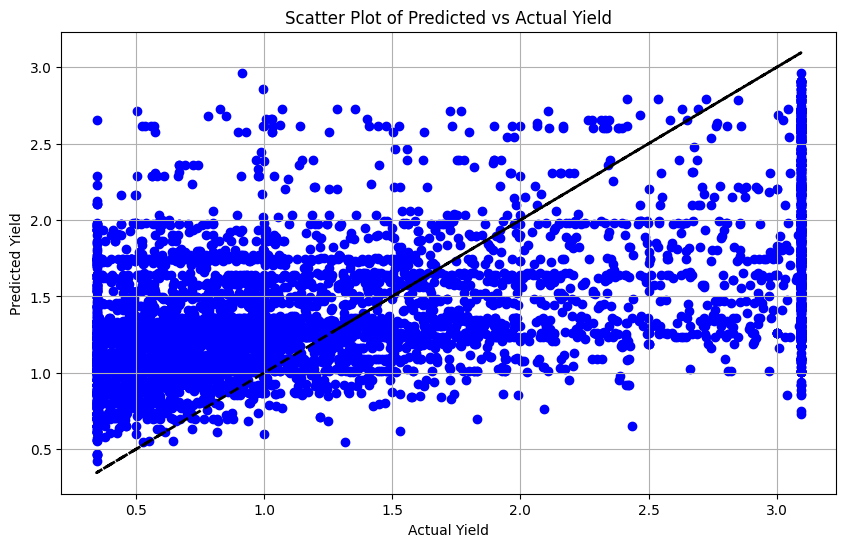

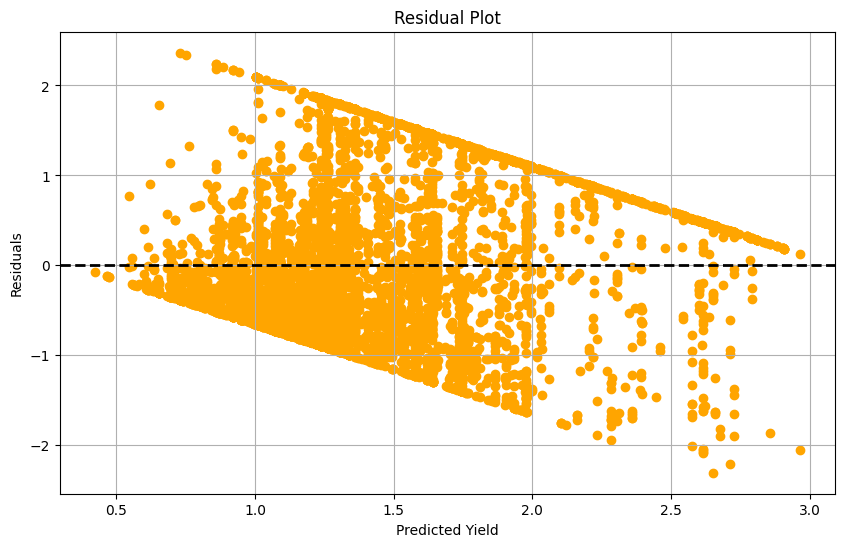

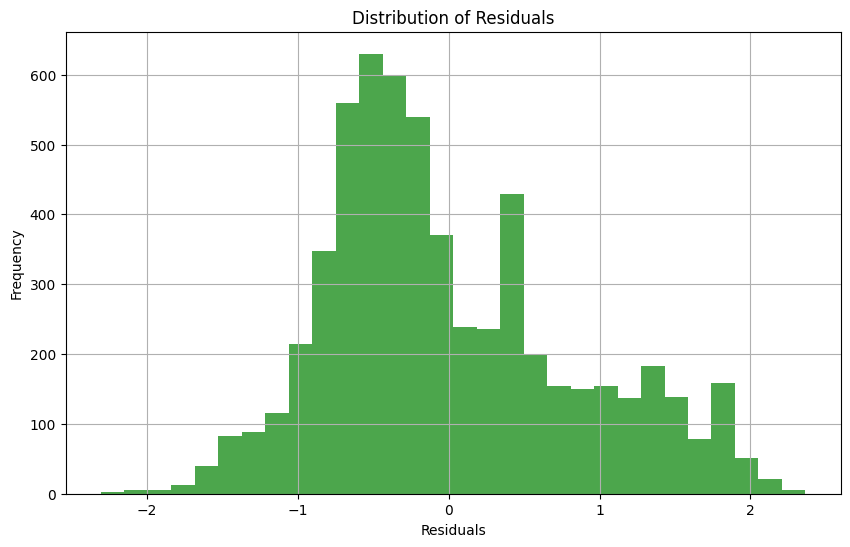

In [4]:
# Visualization of results ---------------------------->

# Scatter plot of Predicted vs Actual values
plt.figure(figsize=(10, 6))
plt.scatter(actualValues, predictedValues, color='blue')
plt.plot(actualValues, actualValues, 'k--', lw=2)  # this part plots a diagonal line that represents perfect predictions
plt.xlabel('Actual Yield')
plt.ylabel('Predicted Yield')
plt.title('Scatter Plot of Predicted vs Actual Yield')
plt.grid(True)
plt.show()

# Residual Plot
residuals = np.array(actualValues) - np.array(predictedValues)
plt.figure(figsize=(10, 6))
plt.scatter(predictedValues, residuals, color='orange')
plt.xlabel('Predicted Yield')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.grid(True)
plt.axhline(y=0, color='k', linestyle='--', linewidth=2)
plt.show()

# Distribution of Residuals
plt.figure(figsize=(10, 6))
plt.hist(residuals, bins=30, color='green', alpha=0.7)
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Distribution of Residuals')
plt.grid(True)
plt.show()

**Results with 70-30 train test split and max depth of trees = 8**

In [5]:
from pyspark.mllib.regression import LabeledPoint
from pyspark.mllib.tree import RandomForest
from pyspark.mllib.linalg import Vectors
from sklearn.metrics import  mean_absolute_percentage_error, mean_absolute_error, mean_squared_error, mean_squared_log_error, r2_score
import matplotlib.pyplot as plt
import numpy as np

randomForestDF = spark.read.csv("scaled_data.csv", header=True, inferSchema=True)

# Converting to RDD of LabeledPoint objects. Not using the target column, "Yield" to make feature vector
rddLabeledPoints = randomForestDF.rdd.map(lambda row: LabeledPoint(row["Yield"], Vectors.dense(row[1:-1])))

train_data, test_data = rddLabeledPoints.randomSplit([0.7, 0.3], seed=42)  #70% training, 30% testing split of data

# Parameters for training model
cFInfo = {} #empty because categorical variables are already properly encoded as numerical values
numTrees = 3  # Trees in random forest
featureSubsetStrategy = "auto"  # this is the strategy for selecting the feature subset
impurity = "variance"  # Impurity measure for variance calculation
maxDepth = 8  # Maximum depth of the trees
maxBins = 32  # Maximum number of bins used for splitting features
seed = 42  # for reproducibility in bootstrapping and feature subset selection

model = RandomForest.trainRegressor(train_data, cFInfo, numTrees,
                                    featureSubsetStrategy=featureSubsetStrategy, impurity=impurity,
                                    maxDepth=maxDepth, maxBins=maxBins, seed=seed)

# MODEL EVALUATION ON TEST DATA
predictions = model.predict(test_data.map(lambda x: x.features))
labelsPredictions = test_data.map(lambda lp: lp.label).zip(predictions)
actualValues = labelsPredictions.map(lambda lp: lp[0]).collect()
predictedValues = labelsPredictions.map(lambda lp: lp[1]).collect()

# 1) TEST MSE
testMSE = labelsPredictions.map(lambda lp: (lp[0] - lp[1]) ** 2).mean()
print("Test Mean Squared Error = " + str(testMSE))

# 2) Mean Absolute Error (MAE)
testMAE = np.mean(np.abs(np.array(actualValues) - np.array(predictedValues)))
print("Test Mean Absolute Error (MAE) =", testMAE)

# 3) Mean Absolute Percentage Error (MAPE)
testMAPE = np.mean(np.abs((np.array(actualValues) - np.array(predictedValues)) / np.array(actualValues))) * 100
print("Test Mean Absolute Percentage Error (MAPE) =", testMAPE)

# 4) Root Mean Squared Error (RMSE)
testRMSE = np.sqrt(mean_squared_error(actualValues, predictedValues))
print("Test Root Mean Squared Error (RMSE) =", testRMSE)

# 5) Calculate R-squared (R2)
test_r2 = r2_score(actualValues, predictedValues)
print("Test R-squared (R2) =", test_r2)

# 6) Calculating accuracy within a specific tolerance level
tolerance = 1.5  # tolerance level
correctPredictions = np.sum(np.abs(np.array(actualValues) - np.array(predictedValues)) <= tolerance)
accuracy = (correctPredictions / len(actualValues)) * 100
print("Accuracy within the", tolerance, "tolerance =", accuracy)

Test Mean Squared Error = 0.5541536543233369
Test Mean Absolute Error (MAE) = 0.5875629728341789
Test Mean Absolute Percentage Error (MAPE) = 66.39422170915157
Test Root Mean Squared Error (RMSE) = 0.7517053693282525
Test R-squared (R2) = 0.45043846549282607
Accuracy within the 1.5 tolerance = 93.5532738596196


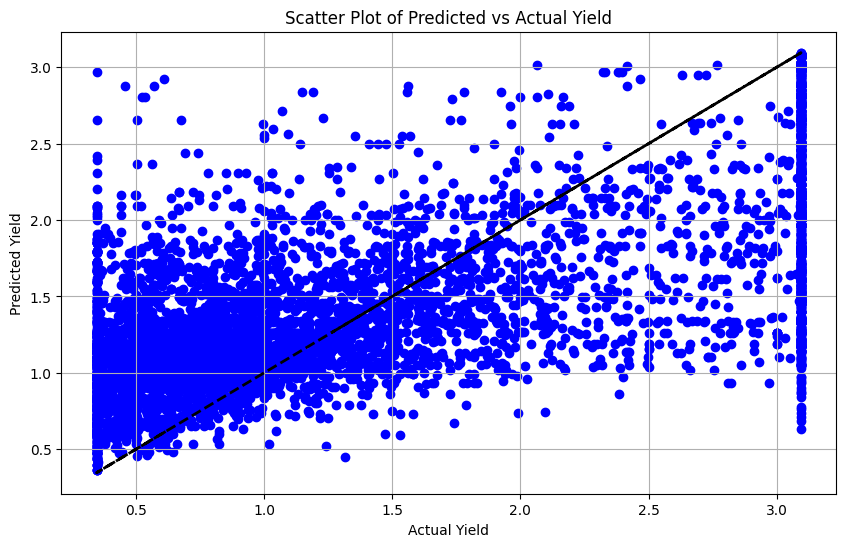

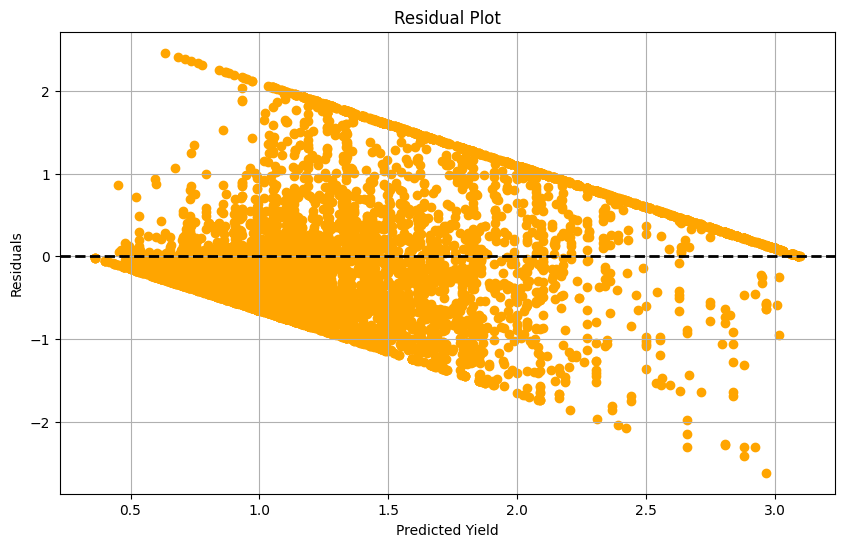

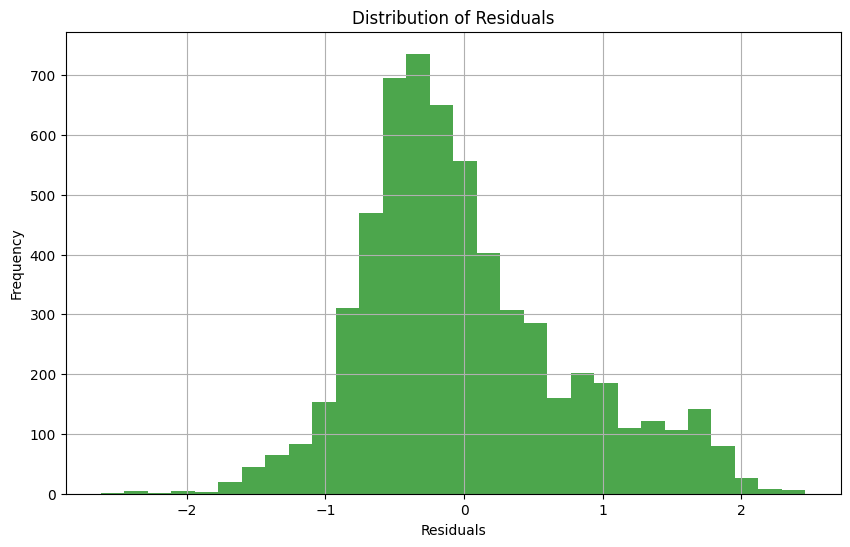

In [6]:
# Visualization of results ---------------------------->

# Scatter plot of Predicted vs Actual values
plt.figure(figsize=(10, 6))
plt.scatter(actualValues, predictedValues, color='blue')
plt.plot(actualValues, actualValues, 'k--', lw=2)  # this part plots a diagonal line that represents perfect predictions
plt.xlabel('Actual Yield')
plt.ylabel('Predicted Yield')
plt.title('Scatter Plot of Predicted vs Actual Yield')
plt.grid(True)
plt.show()

# Residual Plot
residuals = np.array(actualValues) - np.array(predictedValues)
plt.figure(figsize=(10, 6))
plt.scatter(predictedValues, residuals, color='orange')
plt.xlabel('Predicted Yield')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.grid(True)
plt.axhline(y=0, color='k', linestyle='--', linewidth=2)
plt.show()

# Distribution of Residuals
plt.figure(figsize=(10, 6))
plt.hist(residuals, bins=30, color='green', alpha=0.7)
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Distribution of Residuals')
plt.grid(True)
plt.show()

**Results with 70-30 train test split and max depth of trees = 9**

In [7]:
from pyspark.mllib.regression import LabeledPoint
from pyspark.mllib.tree import RandomForest
from pyspark.mllib.linalg import Vectors
from sklearn.metrics import  mean_absolute_percentage_error, mean_absolute_error, mean_squared_error, mean_squared_log_error, r2_score
import matplotlib.pyplot as plt
import numpy as np

randomForestDF = spark.read.csv("scaled_data.csv", header=True, inferSchema=True)

# Converting to RDD of LabeledPoint objects. Not using the target column, "Yield" to make feature vector
rddLabeledPoints = randomForestDF.rdd.map(lambda row: LabeledPoint(row["Yield"], Vectors.dense(row[1:-1])))

train_data, test_data = rddLabeledPoints.randomSplit([0.7, 0.3], seed=42)  #70% training, 30% testing split of data

# Parameters for training model
cFInfo = {} #empty because categorical variables are already properly encoded as numerical values
numTrees = 3  # Trees in random forest
featureSubsetStrategy = "auto"  # this is the strategy for selecting the feature subset
impurity = "variance"  # Impurity measure for variance calculation
maxDepth = 9  # Maximum depth of the trees
maxBins = 32  # Maximum number of bins used for splitting features
seed = 42  # for reproducibility in bootstrapping and feature subset selection

model = RandomForest.trainRegressor(train_data, cFInfo, numTrees,
                                    featureSubsetStrategy=featureSubsetStrategy, impurity=impurity,
                                    maxDepth=maxDepth, maxBins=maxBins, seed=seed)

# MODEL EVALUATION ON TEST DATA
predictions = model.predict(test_data.map(lambda x: x.features))
labelsPredictions = test_data.map(lambda lp: lp.label).zip(predictions)
actualValues = labelsPredictions.map(lambda lp: lp[0]).collect()
predictedValues = labelsPredictions.map(lambda lp: lp[1]).collect()

# 1) TEST MSE
testMSE = labelsPredictions.map(lambda lp: (lp[0] - lp[1]) ** 2).mean()
print("Test Mean Squared Error = " + str(testMSE))

# 2) Mean Absolute Error (MAE)
testMAE = np.mean(np.abs(np.array(actualValues) - np.array(predictedValues)))
print("Test Mean Absolute Error (MAE) =", testMAE)

# 3) Mean Absolute Percentage Error (MAPE)
testMAPE = np.mean(np.abs((np.array(actualValues) - np.array(predictedValues)) / np.array(actualValues))) * 100
print("Test Mean Absolute Percentage Error (MAPE) =", testMAPE)

# 4) Root Mean Squared Error (RMSE)
testRMSE = np.sqrt(mean_squared_error(actualValues, predictedValues))
print("Test Root Mean Squared Error (RMSE) =", testRMSE)

# 5) Calculate R-squared (R2)
test_r2 = r2_score(actualValues, predictedValues)
print("Test R-squared (R2) =", test_r2)

# 6) Calculating accuracy within a specific tolerance level
tolerance = 1.5  # tolerance level
correctPredictions = np.sum(np.abs(np.array(actualValues) - np.array(predictedValues)) <= tolerance)
accuracy = (correctPredictions / len(actualValues)) * 100
print("Accuracy within the", tolerance, "tolerance =", accuracy)

Test Mean Squared Error = 0.508983276492941
Test Mean Absolute Error (MAE) = 0.55873611704732
Test Mean Absolute Percentage Error (MAPE) = 62.87820363511618
Test Root Mean Squared Error (RMSE) = 0.728725332491383
Test R-squared (R2) = 0.48169670338253257
Accuracy within the 1.5 tolerance = 94.20972900185154


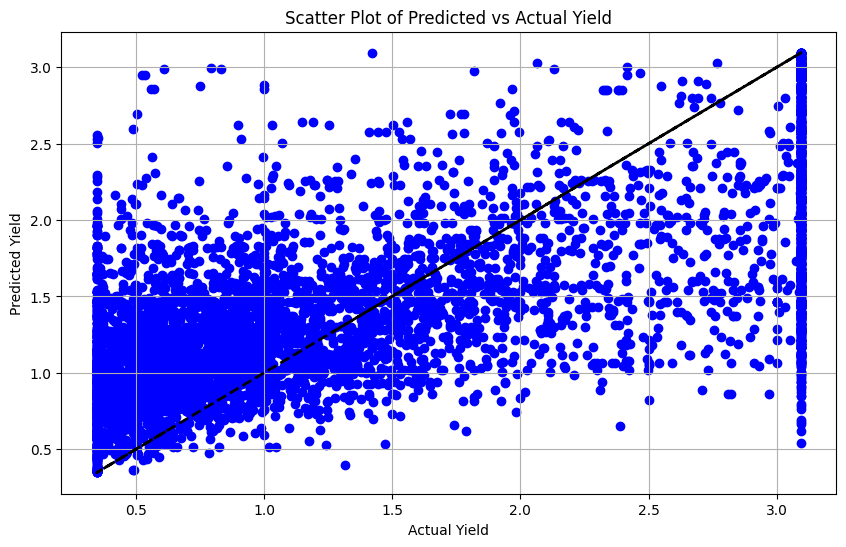

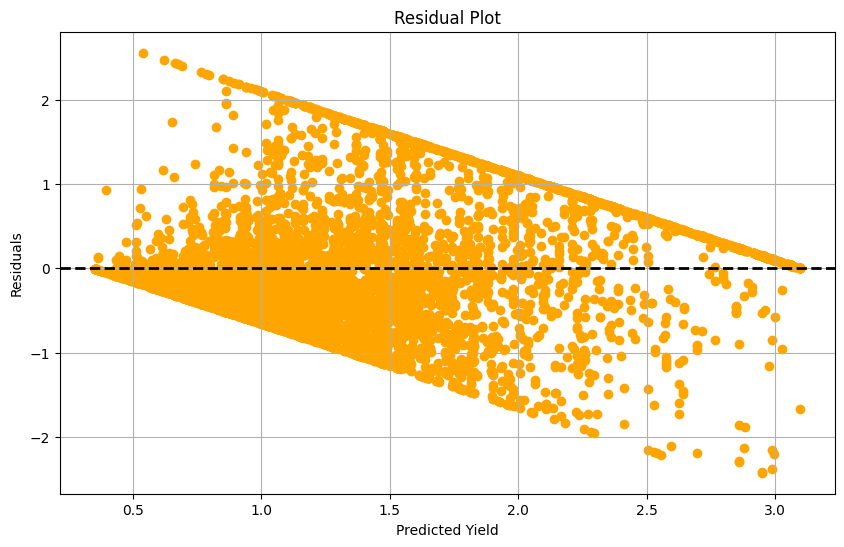

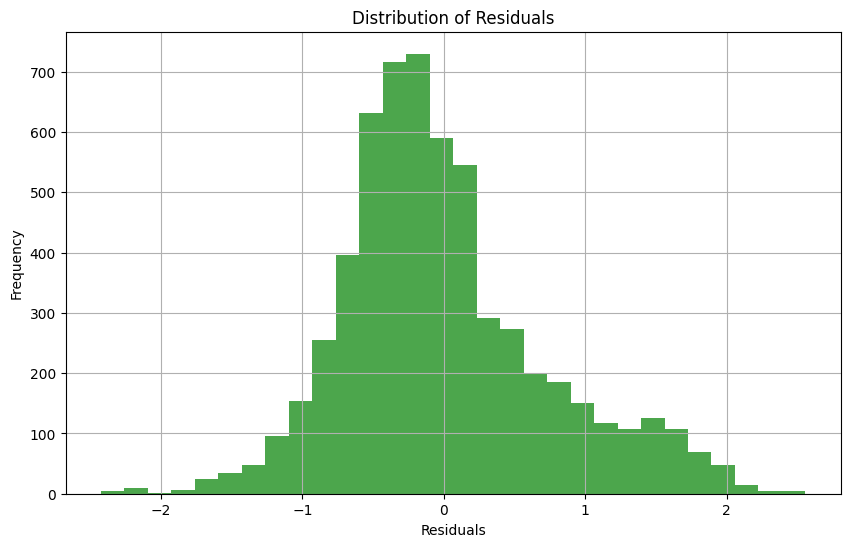

In [8]:
# Visualization of results ---------------------------->

# Scatter plot of Predicted vs Actual values
plt.figure(figsize=(10, 6))
plt.scatter(actualValues, predictedValues, color='blue')
plt.plot(actualValues, actualValues, 'k--', lw=2)  # this part plots a diagonal line that represents perfect predictions
plt.xlabel('Actual Yield')
plt.ylabel('Predicted Yield')
plt.title('Scatter Plot of Predicted vs Actual Yield')
plt.grid(True)
plt.show()

# Residual Plot
residuals = np.array(actualValues) - np.array(predictedValues)
plt.figure(figsize=(10, 6))
plt.scatter(predictedValues, residuals, color='orange')
plt.xlabel('Predicted Yield')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.grid(True)
plt.axhline(y=0, color='k', linestyle='--', linewidth=2)
plt.show()

# Distribution of Residuals
plt.figure(figsize=(10, 6))
plt.hist(residuals, bins=30, color='green', alpha=0.7)
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Distribution of Residuals')
plt.grid(True)
plt.show()

**Results with 80-20 train test split and max depth of trees = 10**

In [9]:
from pyspark.mllib.regression import LabeledPoint
from pyspark.mllib.tree import RandomForest
from pyspark.mllib.linalg import Vectors
from sklearn.metrics import  mean_absolute_percentage_error, mean_absolute_error, mean_squared_error, mean_squared_log_error, r2_score
import matplotlib.pyplot as plt
import numpy as np

randomForestDF = spark.read.csv("scaled_data.csv", header=True, inferSchema=True)

# Converting to RDD of LabeledPoint objects. Not using the target column, "Yield" to make feature vector
rddLabeledPoints = randomForestDF.rdd.map(lambda row: LabeledPoint(row["Yield"], Vectors.dense(row[1:-1])))

train_data, test_data = rddLabeledPoints.randomSplit([0.8, 0.2], seed=42)  #80% training, 20% testing split of data

# Parameters for training model
cFInfo = {} #empty because categorical variables are already properly encoded as numerical values
numTrees = 3  # Trees in random forest
featureSubsetStrategy = "auto"  # this is the strategy for selecting the feature subset
impurity = "variance"  # Impurity measure for variance calculation
maxDepth = 10  # Maximum depth of the trees
maxBins = 32  # Maximum number of bins used for splitting features
seed = 42  # for reproducibility in bootstrapping and feature subset selection

model = RandomForest.trainRegressor(train_data, cFInfo, numTrees,
                                    featureSubsetStrategy=featureSubsetStrategy, impurity=impurity,
                                    maxDepth=maxDepth, maxBins=maxBins, seed=seed)

# MODEL EVALUATION ON TEST DATA
predictions = model.predict(test_data.map(lambda x: x.features))
labelsPredictions = test_data.map(lambda lp: lp.label).zip(predictions)
actualValues = labelsPredictions.map(lambda lp: lp[0]).collect()
predictedValues = labelsPredictions.map(lambda lp: lp[1]).collect()

# 1) TEST MSE
testMSE = labelsPredictions.map(lambda lp: (lp[0] - lp[1]) ** 2).mean()
print("Test Mean Squared Error = " + str(testMSE))

# 2) Mean Absolute Error (MAE)
testMAE = np.mean(np.abs(np.array(actualValues) - np.array(predictedValues)))
print("Test Mean Absolute Error (MAE) =", testMAE)

# 3) Mean Absolute Percentage Error (MAPE)
testMAPE = np.mean(np.abs((np.array(actualValues) - np.array(predictedValues)) / np.array(actualValues))) * 100
print("Test Mean Absolute Percentage Error (MAPE) =", testMAPE)

# 4) Root Mean Squared Error (RMSE)
testRMSE = np.sqrt(mean_squared_error(actualValues, predictedValues))
print("Test Root Mean Squared Error (RMSE) =", testRMSE)

# 5) Calculate R-squared (R2)
test_r2 = r2_score(actualValues, predictedValues)
print("Test R-squared (R2) =", test_r2)

# 6) Calculating accuracy within a specific tolerance level
tolerance = 1.5  # tolerance level
correctPredictions = np.sum(np.abs(np.array(actualValues) - np.array(predictedValues)) <= tolerance)
accuracy = (correctPredictions / len(actualValues)) * 100
print("Accuracy within the", tolerance, "tolerance =", accuracy)

Test Mean Squared Error = 0.5280301533213078
Test Mean Absolute Error (MAE) = 0.5333175622142089
Test Mean Absolute Percentage Error (MAPE) = 59.1269184427486
Test Root Mean Squared Error (RMSE) = 0.7113868873585175
Test R-squared (R2) = 0.5097710845032066
Accuracy within the 1.5 tolerance = 94.47681783633139


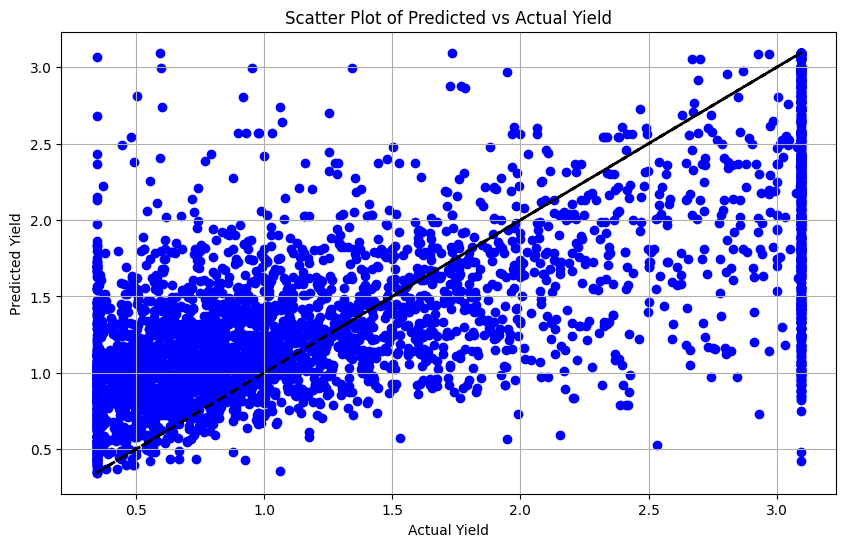

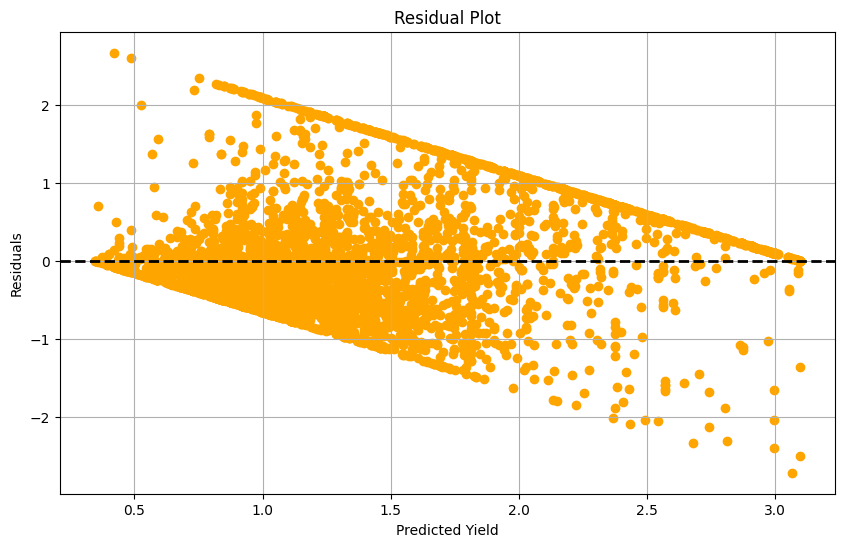

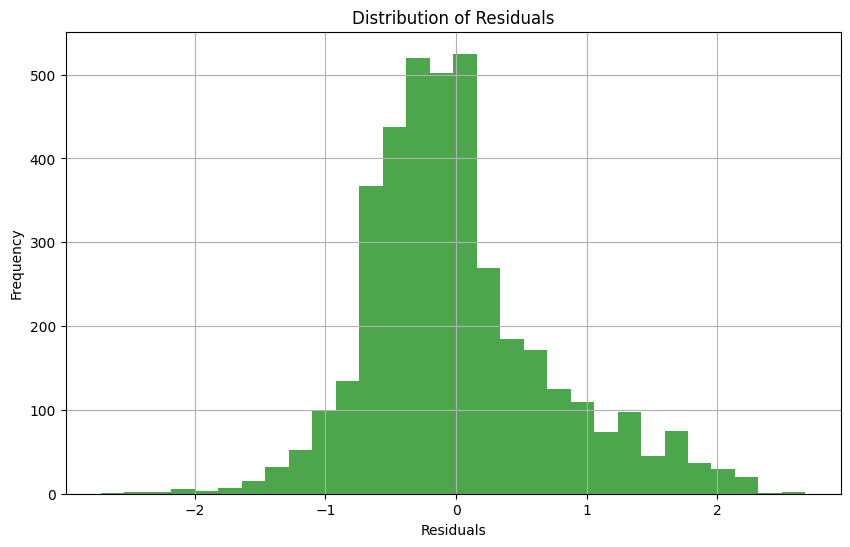

In [10]:
# Visualization of results ---------------------------->

# Scatter plot of Predicted vs Actual values
plt.figure(figsize=(10, 6))
plt.scatter(actualValues, predictedValues, color='blue')
plt.plot(actualValues, actualValues, 'k--', lw=2)  # this part plots a diagonal line that represents perfect predictions
plt.xlabel('Actual Yield')
plt.ylabel('Predicted Yield')
plt.title('Scatter Plot of Predicted vs Actual Yield')
plt.grid(True)
plt.show()

# Residual Plot
residuals = np.array(actualValues) - np.array(predictedValues)
plt.figure(figsize=(10, 6))
plt.scatter(predictedValues, residuals, color='orange')
plt.xlabel('Predicted Yield')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.grid(True)
plt.axhline(y=0, color='k', linestyle='--', linewidth=2)
plt.show()

# Distribution of Residuals
plt.figure(figsize=(10, 6))
plt.hist(residuals, bins=30, color='green', alpha=0.7)
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Distribution of Residuals')
plt.grid(True)
plt.show()